<a href="https://colab.research.google.com/github/hhchin1995/water-quality-clustering/blob/main/Water_samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water samples clustering with custom sampling

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!pip install bioinfokit

import bioinfokit

     |████████████████████████████████| 84 kB 2.1 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56749 sha256=5451caa9170624ba2806813cc638425deee84a6331076623bec20a6722897daf
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=c27b6f146119f27f14e6b86a9aec68c8bf9a6bff12b97a70579e3c989fe46c10
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


## Importing the dataset

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

# dataset = pd.read_csv('PRES_plastic4-1.csv')
dataset = pd.read_csv('Water Samples_2.csv')
# PET
# X = dataset.iloc[:-54, 2:4].values
# y = dataset.iloc[:-54, 5].values

# PE
# X = dataset.iloc[15:-20, 2:5].values
# X[:,1]=X[:,2]
# X=X[:,:-1]
# y = dataset.iloc[15:-20, 5].values



# PP
# X = dataset.iloc[50:, 2:5].values
# X[:,1]=X[:,2]
# X=np.delete(X,8,0)
# X=X[:,:-1]
# y = dataset.iloc[50:, 5].values
# y=np.delete(y,8,0)
X_c = dataset.iloc[0:100, 1:14].values

Demand=dataset.iloc[100:104,1:14].values
Supply=dataset.iloc[104:107,1:14].values

print(Demand)


y_ori=dataset.iloc[0:100, 0].values
print(y_ori.shape)

print(Supply)

# X_test=np.array([[8.0,112, 3, 12, 1, 30, 0.2, 10, 123, 0.08, 0.05, 1, 0.9],
#                  [7.0,112, 3, 12, 1, 30, 0.2, 10, 123, 0.08, 0.05, 1, 0.9],
#                  [6.0,1000, 3, 12, 1, 30, 0.2, 10, 123, 0.08, 0.05, 1, 0.9]])



Saving Water Samples_2.csv to Water Samples_2 (3).csv
[[6.3400e+00 1.1387e+02 2.0000e+00 1.8410e+01 1.9600e+00 1.4360e+01
  6.0000e-02 9.8800e+00 6.0200e+01 1.1000e-01 7.0000e-02 4.0000e-02
  7.4000e-01]
 [6.3100e+00 1.0218e+02 1.8300e+00 1.9360e+01 2.8300e+00 1.9240e+01
  3.0000e-02 1.0400e+00 8.9070e+01 2.6000e-01 1.4000e-01 3.0000e-02
  1.8900e+00]
 [6.5500e+00 9.9040e+01 1.0600e+00 1.6100e+00 1.9400e+00 1.3120e+01
  8.0000e-02 2.6600e+00 4.1440e+01 9.0000e-02 3.0000e-02 3.0000e-02
  8.0000e-02]
 [7.6700e+00 8.9350e+01 4.9100e+00 2.1940e+01 3.3500e+00 2.7580e+01
  2.7000e-01 7.0100e+00 1.7410e+02 5.7000e-01 2.0000e-02 1.2200e+00
  3.7300e+00]]
(100,)
[[8.9400e+00 1.4665e+02 1.6000e+00 3.9850e+01 7.1700e+00 8.0740e+01
  6.8000e-01 9.6200e+00 2.9767e+02 8.9000e-01 2.0000e-01 3.4300e+00
  1.2700e+00]
 [7.6000e+00 1.0914e+02 1.8000e-01 2.2800e+00 2.4800e+00 1.4370e+01
  2.0000e-02 3.7200e+00 1.2340e+01 9.0000e-02 0.0000e+00 1.0000e-02
  8.0000e-02]
 [1.2140e+01 3.9312e+02 1.4490e+01 9.4

## Feature Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# sc.fit(X_c)
# X_c=sc.transform(X_c)
X_c=sc.fit_transform(X_c)

Supply=sc.transform(Supply)
Demand=sc.transform(Demand)

print(X_c)


[[ 0.25133645 -0.07078601 -0.61371552 ... -0.75674966 -0.49926619
  -0.6886563 ]
 [ 0.01233915 -0.1641189  -0.92555599 ... -0.79438969 -0.83492792
  -0.97818811]
 [-0.75074654 -0.31447719  1.65367133 ...  0.97259506  1.05348346
   0.38458407]
 ...
 [-0.81236779  0.4344222  -0.13926009 ... -0.01235772 -0.1004438
   0.22432917]
 [ 0.30240214 -0.75979236 -0.60926754 ... -0.27636371  0.34056582
  -1.13329719]
 [ 0.13160895 -0.2174256  -0.90597326 ... -0.84695674 -0.84374807
  -0.74777832]]


Custom Sampling (clean data)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Scale Features
scaler = StandardScaler()
x_c_scaled = X_c
y_train=y_ori

# Fit KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_c_scaled, y_train)
preds = pd.DataFrame(knn.predict_proba(x_c_scaled))

preds.columns = ['label_0', 'label_1','label_2','label_3','label_4']

# Bind defaulted label proba to train dataset
# print(preds.iloc[1,2])

y_prob=np.zeros((len(y_train),1))
for i in range(0,len(y_train)):
  y_prob[i]=preds.iloc[i,int(y_train[i])-1]

#print(y_prob)
# X_train['knn_minority_class_proba'] = preds['label_1']

x_c_filtered=np.zeros(X_c.shape)
y_train_filtered=np.zeros(X_c.shape[0])

for ii in range(0,len(y_train_filtered)):
  if y_prob[ii]>=0.5:
    x_c_filtered[ii,:] = X_c[ii,:]
    y_train_filtered[ii] = y_train[ii]

x_c_filtered=x_c_filtered[np.all(x_c_filtered != 0, axis=1), :]
y_train_filtered=y_train_filtered[y_train_filtered >0]


# Oversample using SMOTE
sm = SMOTE(k_neighbors=1,random_state=40)
X_c, y_ori = sm.fit_resample(x_c_filtered, y_train_filtered)

print(X_c)

[[ 0.25133645 -0.07078601 -0.61371552 ... -0.75674966 -0.49926619
  -0.6886563 ]
 [ 0.01233915 -0.1641189  -0.92555599 ... -0.79438969 -0.83492792
  -0.97818811]
 [-0.75074654 -0.31447719  1.65367133 ...  0.97259506  1.05348346
   0.38458407]
 ...
 [ 1.88125182  2.98444725  1.34149065 ...  2.61962305  1.1744567
   2.34073095]
 [-1.74834306  0.1324145   1.89644547 ...  2.0478157   1.85077791
   1.31710007]
 [ 1.4497218   3.29764776  1.43454993 ...  0.10471928  0.26151483
  -0.07410136]]


Clustering

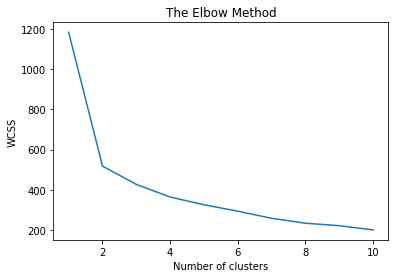

In [ ]:
# Using the elbow method to find the optimal number of clusters




#####X_c=X_train


#X_c = sc.fit_transform(X_c)




from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_c)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Applying PCA on data**

In [ ]:
from sklearn.decomposition import PCA
X=X_c
pca = PCA(n_components = 7)    # Set to 7 for 90% variance
X_c= pca.fit_transform(X_c)
Supply=pca.transform(Supply)
Demand=pca.transform(Demand)


print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
loadings=pca.components_




# # loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'],
# # #                                                    'PC7', 'PC8','PC9', 'PC10','PC11', 'PC12',
# # #                                                    'PC13', 'PC14'],
# #                          index=dataset.columns[2:])
# # print(loadings)

# Applying Kernel PCA
# from sklearn.decomposition import KernelPCA
# kpca = KernelPCA(n_components = 7, kernel = 'linear',fit_inverse_transform=True)
# X_c = kpca.fit_transform(X_c)

# loadings=np.matmul(np.linalg.pinv(X),X_c)
# print(loadings)

# Supply=kpca.transform(Supply)
# Demand=kpca.transform(Demand)

# kpca_transform = kpca.fit_transform(X_c)
# explained_variance = np.var(kpca_transform, axis=0)
# ev = explained_variance / np.sum(explained_variance)
# print(ev)
# for i in range(1,len(ev)):
#   ev[i]=ev[i]+ev[i-1]

# cum_ev=ev
# print(cum_ev)




[0.57873728 0.09282266 0.08193184 0.05413182 0.03963643 0.0352507
 0.02764542]
0.9101561536816464


[0.57873728 0.09282266 0.08193184 0.05413182 0.03963643 0.0352507
 0.02764542 0.02501658 0.01980723 0.01575352 0.01285831 0.01073441
 0.00567379]


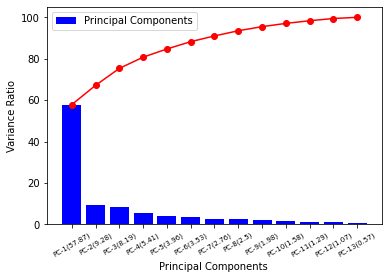

In [ ]:
ev=pca.explained_variance_ratio_
print(ev)
plt.bar([1,2,3,4,5,6,7,8,9,10,11,12,13],list(ev*100),label='Principal Components',color='b')
plt.legend()
plt.xlabel('Principal Components ')
n=list(ev*100)
pc=[]
for i in range(len(n)):
  n[i]=round(n[i],2)
  pc.append('PC-'+str(i+1)+'('+str(n[i])+')')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13],pc, fontsize=7, rotation=30)
plt.ylabel('Variance Ratio')

for i in range(1,len(ev)):
  ev[i]=ev[i]+ev[i-1]

cum_ev=ev

plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13],list(cum_ev*100),label='Principal Components',color='r',marker='o')

plt.show()

(100, 7)
0.5761990630508591
0.8187539422307362
125.94466569188441


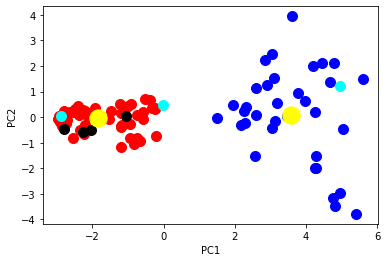

In [ ]:

# Training the K-Means model on the dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_c)

Supply_kmeans=kmeans.predict(Supply)
Demand_kmeans=kmeans.predict(Demand)

#X_c = sc.inverse_transform(X_c)
# kmeans.cluster_centers_ = sc.inverse_transform(kmeans.cluster_centers_)

# Visualising the clusters
from matplotlib.colors import ListedColormap
# X1, X2 = np.meshgrid(np.arange(start = X_c[:, 0].min()-0.01, stop = X_c[:, 0].max()+0.2, step = 0.05),
#                      np.arange(start = X_c[:, 1].min()-0.01, stop = X_c[:, 1].max()+0.2, step = 0.05))
# plt.contourf(X1, X2, kmeans.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.25, cmap = ListedColormap(('red', 'blue','green')))

plt.scatter(X_c[y_kmeans == 0, 0], X_c[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_c[y_kmeans == 1, 0], X_c[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_c[y_kmeans == 2, 0], X_c[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(Supply[Supply_kmeans == 0, 0], Supply[Supply_kmeans == 0, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[Supply_kmeans == 1, 0], Supply[Supply_kmeans == 1, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[Supply_kmeans == 2, 0], Supply[Supply_kmeans == 2, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Demand[Demand_kmeans == 0, 0], Demand[Demand_kmeans == 0, 1], s = 100, c = 'black', label = 'Sink')
plt.scatter(Demand[Demand_kmeans == 1, 0], Demand[Demand_kmeans == 1, 1], s = 100, c = 'black', label = 'Sink')
plt.scatter(Demand[Demand_kmeans == 2, 0], Demand[Demand_kmeans == 2, 1], s = 100, c = 'black', label = 'Sink')

# plt.scatter(X_c[y_kmeans == 3, 0], X_c[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X_c[y_kmeans == 4, 0], X_c[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# plt.title('Clusters of plastic waste')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.legend()
# plt.show()
print(X_c.shape)
# Evaluation
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score

labels = kmeans.labels_
print(metrics.silhouette_score(X_c, labels, metric='euclidean'))
print(davies_bouldin_score(X_c, labels))
print(metrics.calinski_harabasz_score(X_c, labels))

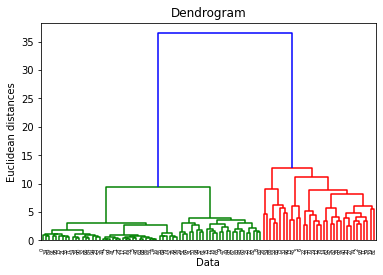

In [ ]:
import scipy.cluster.hierarchy as sch
#X_c = sc.fit_transform(X_c)

dendrogram = sch.dendrogram(sch.linkage(X_c, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Data')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
# Training the Hierarchical Clustering model on the dataset
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters =2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_c)
#X_c = sc.inverse_transform(X_c)



# Evaluation
print(metrics.silhouette_score(X_c, y_hc, metric='euclidean'))
print(davies_bouldin_score(X_c, y_hc))
print(metrics.calinski_harabasz_score(X_c, y_hc))

0.5761990630508591
0.8187539422307362
125.94466569188441


In [ ]:
# Fit KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_c, y_hc)

y_supply=knn.predict(Supply)
y_demand=knn.predict(Demand)
preds_supply = pd.DataFrame(knn.predict_proba(Supply))
preds_demand = pd.DataFrame(knn.predict_proba(Demand))


preds_supply.columns = ['label_0', 'label_1']
preds_demand.columns=preds_supply.columns 

print(preds_supply)
print(preds_demand)

   label_0  label_1
0      0.0      1.0
1      0.0      1.0
2      1.0      0.0
   label_0  label_1
0      0.0      1.0
1      0.0      1.0
2      0.0      1.0
3      0.0      1.0


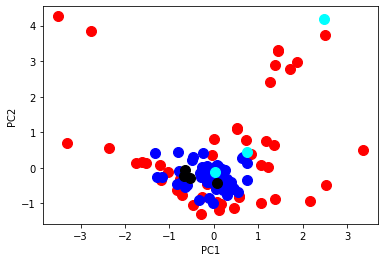

In [ ]:
# Visualising the clusters
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_c, y_hc)

# X1, X2 = np.meshgrid(np.arange(start = X_c[:, 0].min()-0.01, stop = X_c[:, 0].max()+0.2, step = 0.05),
#                      np.arange(start = X_c[:, 1].min()-0.01, stop = X_c[:, 1].max()+0.2, step = 0.05))
# plt.contourf(X1, X2, knn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
#              alpha = 0.25, cmap = ListedColormap(('red', 'blue','green')))

plt.scatter(X_c[y_hc == 0, 0], X_c[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_c[y_hc == 1, 0], X_c[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_c[y_hc == 2, 0], X_c[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(Supply[y_supply == 0, 0], Supply[y_supply == 0, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[y_supply == 1, 0], Supply[y_supply == 1, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Supply[y_supply == 2, 0], Supply[y_supply == 2, 1], s = 100, c = 'cyan', label = 'Source')
plt.scatter(Demand[y_demand == 0, 0], Demand[y_demand == 0, 1], s = 100, c = 'black', label = 'Sink')
plt.scatter(Demand[y_demand == 1, 0], Demand[y_demand == 1, 1], s = 100, c = 'black', label = 'Sink')
plt.scatter(Demand[y_demand == 2, 0], Demand[y_demand == 2, 1], s = 100, c = 'black', label = 'Sink')
# plt.scatter(X_c[y_hc == 3, 0], X_c[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
# plt.scatter(X_c[y_hc == 4, 0], X_c[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# plt.title('Clusters of plastic waste')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.legend()
plt.show()

**DBSCAN**

In [ ]:
i=np.identity(dataset.shape[1]-2)
print(pca.transform(i))

[[ 0.24047763  0.12585364]
 [ 0.1915152   0.38887186]
 [ 0.25987549 -0.02594473]
 [ 0.22735792  0.30938942]
 [ 0.29270299  0.12400405]
 [ 0.27455235 -0.11356291]
 [ 0.18191918 -0.04044776]
 [ 0.09498813 -0.05360648]
 [ 0.25988127 -0.04787519]
 [ 0.26716293 -0.03215638]
 [ 0.20028072  0.36740759]
 [ 0.21979492  0.33937065]
 [ 0.19512607 -0.28386288]
 [ 0.15585633  0.27225593]
 [ 0.16509275 -0.11903487]
 [-0.21263366  0.16336045]
 [ 0.09070376 -0.19443126]
 [ 0.19044967 -0.0882263 ]
 [ 0.21966761 -0.14127231]
 [ 0.24482695 -0.31879575]
 [ 0.26121121 -0.29587361]]


In [ ]:
from sklearn.cluster import DBSCAN
#X_c = sc.fit_transform(X_c)
db = DBSCAN(eps=0.35, min_samples=30).fit(X_c)
labels = db.labels_
print(labels)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_c, labels))

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


ValueError: ignored

In [ ]:
from sklearn.cluster import AffinityPropagation
# Compute Affinity Propagation
af = AffinityPropagation(preference=-0.69, random_state=10,affinity='euclidean').fit(X_c)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)
print(labels)

print("Estimated number of clusters: %d" % n_clusters_)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X_c, labels, metric="sqeuclidean")
)

[2 2 1 0 2 2 0 2 3 3 2 1 1 0 0 2 2 2 3 0 1 2 1 2 3 3 0 1 2 0 0 3 2 1 2 2 2
 3 0 1 0 2 1 3 2 0 0 3 2 3 3 3 2 0 2 2 2 2 2 0 3 3 0 2 3 3 2 3 2 2 1 2 3 0
 1 3 2 3 1 2 3 0 3 3 2 0 2 0 0 2 2 2 0 1 2 2 2 3 3 2]
Estimated number of clusters: 4
Silhouette Coefficient: 0.840


Decision Tree

In [ ]:
y_ori=y_kmeans
# X_c=sc.inverse_transform(X_c)

|--- PC3 <= -0.78
|   |--- class: 1
|--- PC3 >  -0.78
|   |--- PC1 <= 1.04
|   |   |--- class: 0
|   |--- PC1 >  1.04
|   |   |--- class: 1



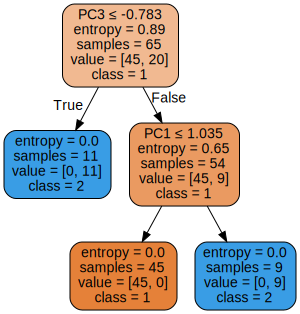

In [ ]:
#graph.render("iris") 
features=['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
# features=['pH','DO','BOD','COD','KMnO4','SS','NH3','NO4','Cl','Fe','Mn','AB','CCL']
classes=['1','2']



from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c, y_ori, test_size = 0.35, random_state = 10) 
# X_train, X_test, y_train, y_test = train_test_split(X_c, y_hc, test_size = 0.3, random_state = 10) 

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn import tree
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 25,max_features=2,max_depth=2) #PE Random_state = 25,  #PP Random_state = 0. #PET Random_state=25
classifier.fit(X_train, y_train)
# classifier.fit(X_c, y_kmeans)
#tree.plot_tree(classifier)

r=export_text(classifier,feature_names=features)
print(r)




import graphviz 
dot_data = tree.export_graphviz(classifier, out_file=None, 
                     feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data) 
graph

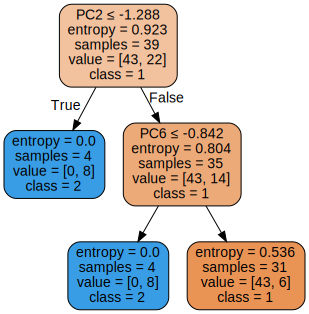

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0,max_features=2,max_depth=2)
classifier2.fit(X_train, y_train)
estimator=classifier2.estimators_[5]

dot_data2 = tree.export_graphviz(estimator, out_file=None, 
                     feature_names=features,  
                      class_names=classes,  
                      filled=True, rounded=True,  
                     special_characters=True)  
graph2 = graphviz.Source(dot_data2) 
graph2

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

y_pred2 = classifier2.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)
print(accuracy_score(y_test, y_pred2))

target_names = classes
print(classification_report(y_test, y_pred, target_names=target_names))
print(classification_report(y_test, y_pred2, target_names=target_names))

[[19  2]
 [ 0 14]]
0.9428571428571428
[[21  0]
 [ 0 14]]
1.0
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.93        14

    accuracy                           0.94        35
   macro avg       0.94      0.95      0.94        35
weighted avg       0.95      0.94      0.94        35

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



[[ 0.00502277  0.86314144  0.06039885  0.06325517  0.19315947  0.268118
  -0.13189197]
 [ 0.16900303 -0.11935678  0.80662504 -0.11735115  0.00244711  0.06522924
   0.14218692]
 [ 0.3380722   0.0241874  -0.03109191  0.0463535  -0.01290483 -0.00629011
  -0.03960303]
 [ 0.34355486  0.02522744  0.0347226   0.06944311 -0.02188691  0.13517324
  -0.00743983]
 [ 0.27257764  0.28517181  0.20884394 -0.01474467 -0.55483216 -0.28736523
   0.03649787]
 [ 0.28072003  0.16020634  0.06399008  0.08018263  0.44016525 -0.70898385
   0.1335312 ]
 [ 0.30473438  0.09046244 -0.29431328  0.2710115   0.04183782 -0.04522417
  -0.08506302]
 [ 0.29869484 -0.17327396  0.07531586  0.11261498 -0.0373172   0.10308783
  -0.83028615]
 [ 0.28249357 -0.07305513 -0.32431256  0.23420137 -0.43102681 -0.00392642
   0.30360392]
 [ 0.30325409 -0.01106204  0.01317912 -0.45449988 -0.17543469  0.02891551
  -0.02109774]
 [ 0.3070564   0.01744986  0.03505502  0.1141148   0.14100927  0.54872895
   0.38389118]
 [ 0.28311589 -0.297276

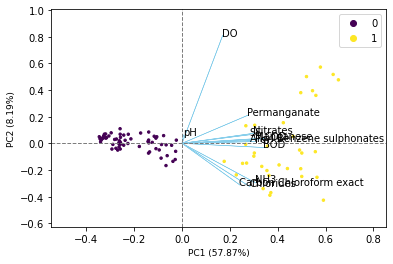

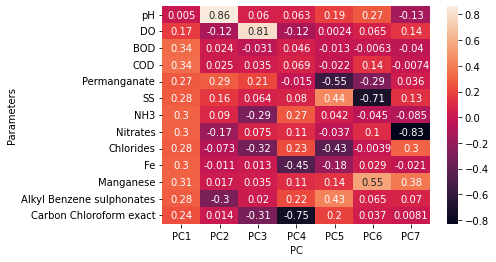

In [ ]:
from bioinfokit.visuz import cluster

# i=np.identity(dataset.shape[1])
# loadings=kpca.transform(i)
# print(loadings)
# print(columns)
print(loadings.T)
X_c_p=X_c
X_c_p[:,1]=X_c[:,2]
print(X_c)

cluster.biplot(cscore=X_c_p[:,0:2], loadings=[loadings.T[:,0],loadings.T[:,2]], labels=columns, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[2]*100, 2),colorlist=y_kmeans,show=True)

import seaborn as sns
# import matplotlib.pyplot as plt
x_axis_labels=['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
y_axis_labels=columns
ax = sns.heatmap(loadings.T, annot=True,xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('PC')
plt.ylabel('Parameters')
plt.show()
